In [9]:
import numpy as np
from google.colab import files

uploaded = files.upload()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load data
sales = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date'])

sales
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [11]:
sales.shape

(113036, 18)

In [12]:
sales.info

<bound method DataFrame.info of              Date  Day     Month  Year  ...  Unit_Price Profit  Cost Revenue
0      2013-11-26   26  November  2013  ...         120    590   360     950
1      2015-11-26   26  November  2015  ...         120    590   360     950
2      2014-03-23   23     March  2014  ...         120   1366  1035    2401
3      2016-03-23   23     March  2016  ...         120   1188   900    2088
4      2014-05-15   15       May  2014  ...         120    238   180     418
...           ...  ...       ...   ...  ...         ...    ...   ...     ...
113031 2016-04-12   12     April  2016  ...          64    112    72     184
113032 2014-04-02    2     April  2014  ...          64    655   528    1183
113033 2016-04-02    2     April  2016  ...          64    655   528    1183
113034 2014-03-04    4     March  2014  ...          64    684   576    1260
113035 2016-03-04    4     March  2016  ...          64    655   552    1207

[113036 rows x 18 columns]>

In [13]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [14]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [15]:
sales['Unit_Cost'].mean()

267.296365759581

In [16]:
sales['Unit_Cost'].median()

9.0

In [17]:
#Calculate sum of Revenue by Years
sales.groupby(['Year']).sum()['Revenue']

Year
2011     8964888
2012     9175983
2013    15240037
2014    14152724
2015    20023991
2016    17713385
Name: Revenue, dtype: int64

In [18]:
#Calculate sum of Revenue by Customer_Age
sales.groupby(['Customer_Age']).sum()['Revenue']

Customer_Age
17     726878
18    1303649
19    1407281
20     898471
21    1238272
       ...   
82       1493
84       5625
85       1405
86       4217
87        552
Name: Revenue, Length: 70, dtype: int64

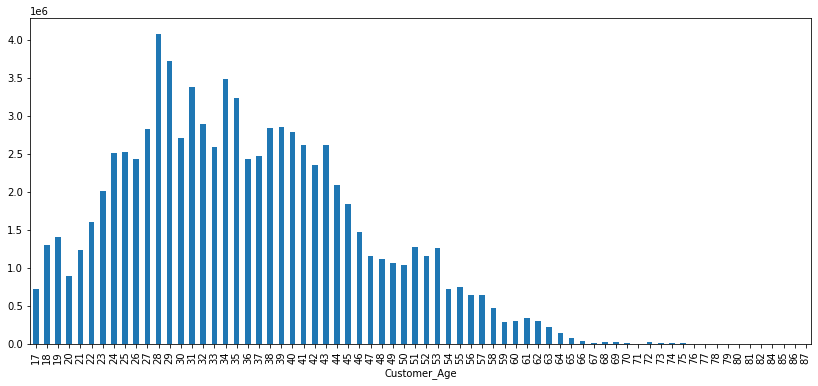

In [19]:
#Draw Bar chart revenue by customer_age
#You can see revenue of customer_age is 28 is biggest
sales.groupby(['Customer_Age']).sum()['Revenue'].plot(kind='bar',figsize=(14,6))

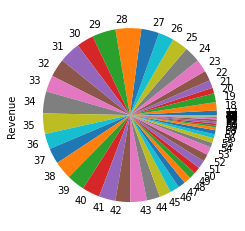

In [20]:
#Draw pie chart of revenue group by customer_age
sales.groupby(['Customer_Age']).sum()['Revenue'].plot(kind='pie')

In [21]:
#How to sort
sales.groupby(['Customer_Age']).sum()['Revenue']

Customer_Age
17     726878
18    1303649
19    1407281
20     898471
21    1238272
       ...   
82       1493
84       5625
85       1405
86       4217
87        552
Name: Revenue, Length: 70, dtype: int64

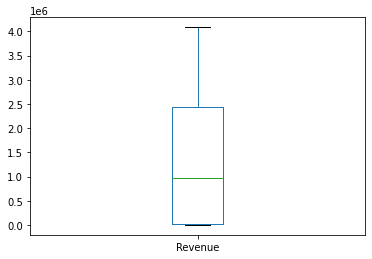

In [22]:
#Draw revenune by customer_age by box
sales.groupby(['Customer_Age']).sum()['Revenue'].plot(kind='box')

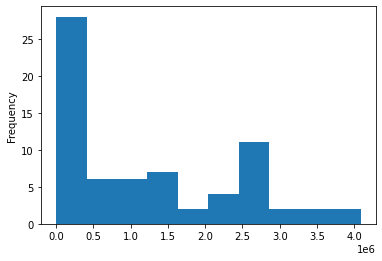

In [23]:
sales.groupby(['Customer_Age']).sum()['Revenue'].plot(kind='hist')

In [24]:
sales.groupby(['Customer_Age']).describe()

Day                        ... Revenue                 
               count       mean        std  ...     50%     75%      max
Customer_Age                                ...                         
17            1306.0  15.859112   9.110731  ...   173.0  657.25  10519.0
18            1760.0  15.640909   8.395736  ...   181.0  735.50  12022.0
19            2010.0  15.715423   8.848293  ...   137.0  688.75  14169.0
20            2020.0  15.442574   8.524949  ...   120.0  491.25  12308.0
21            2230.0  16.328251   8.865571  ...   118.5  539.00   9339.0
...              ...        ...        ...  ...     ...     ...      ...
82               4.0   9.000000   0.000000  ...   361.0  588.25    631.0
84              18.0  17.777778  10.468752  ...   317.0  468.25    806.0
85              16.0  13.000000   7.211103  ...    56.5  124.75    261.0
86               8.0  16.500000  12.294017  ...   264.0  772.75   1574.0
87               6.0  19.000000   0.000000  ...    22.5  154.00    295.0

[70 rows x 64 columns]

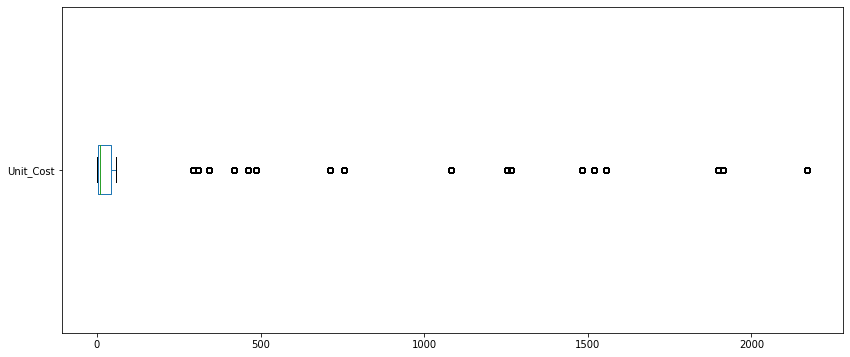

In [25]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))


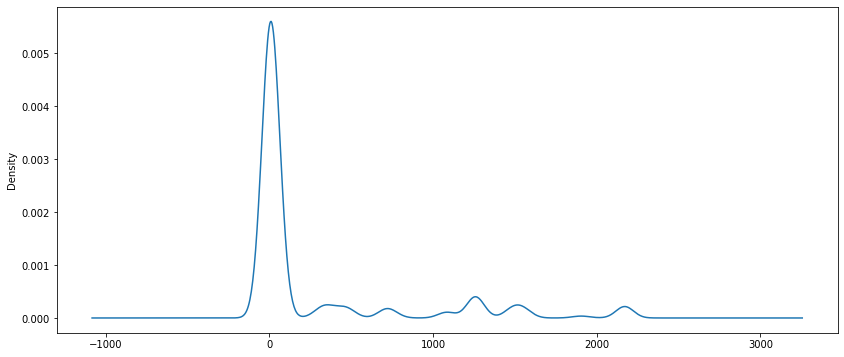

In [26]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde

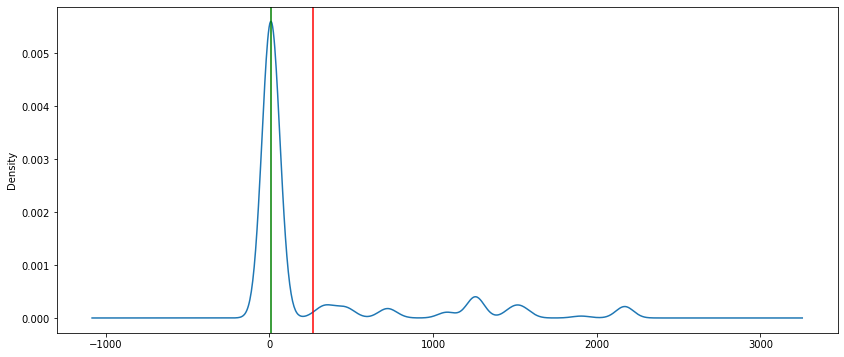

In [27]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'dollars')

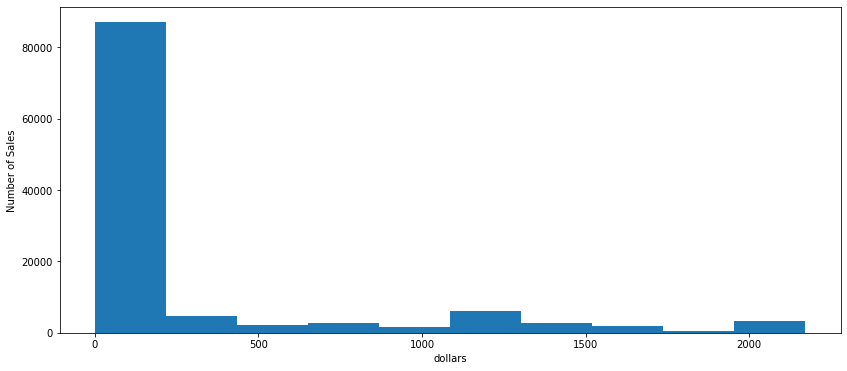

In [28]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

In [29]:
sales['Age_Group'].value_counts()


Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

In [30]:
sales['Customer_Age'].value_counts().head(70)

31    4382
34    4300
29    4214
32    4092
28    3988
      ... 
86       8
76       6
80       6
87       6
82       4
Name: Customer_Age, Length: 70, dtype: int64

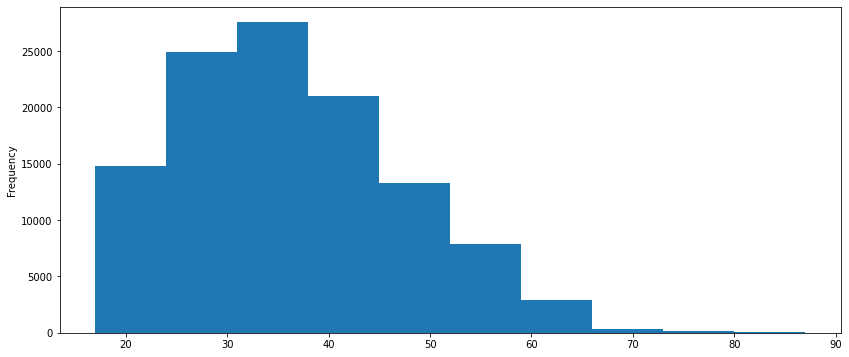

In [31]:
ax = sales['Customer_Age'].plot(kind='hist', figsize=(14,6))

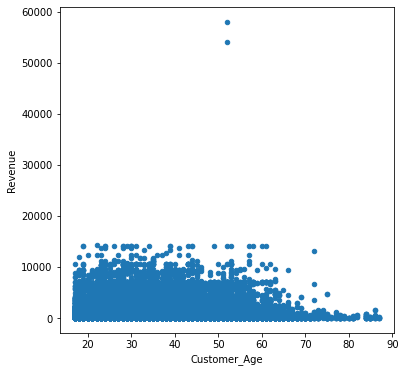

In [32]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))


In [33]:
#How many records belong to Age Group Youth (<25) or Adults (35-64)?
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]


73652

In [34]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].describe()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000
mean,15.653424,2014.417178,38.816923,12.064357,257.464373,436.654022,280.999484,456.351192,737.350676
std,8.801791,1.269487,11.914412,9.546997,543.191705,911.154971,452.037648,881.982509,1304.187979
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,1.000000,2.000000
25%,8.000000,2013.000000,35.000000,2.000000,2.000000,5.000000,28.000000,27.000000,60.000000
50%,16.000000,2014.000000,40.000000,11.000000,9.000000,24.000000,95.000000,104.000000,208.000000
75%,23.000000,2016.000000,47.000000,20.000000,42.000000,64.000000,351.000000,420.000000,781.000000
max,31.000000,2016.000000,64.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


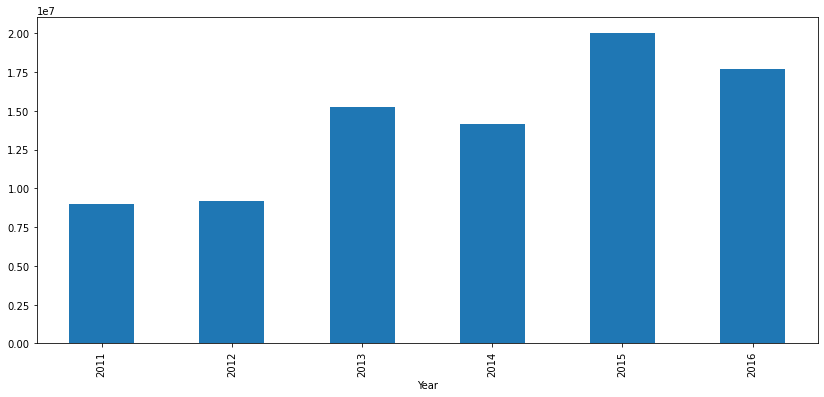

In [35]:
#Plot bar revenue by year ==> What is the biggest revenue by years, year =2015 ?
sales.groupby(['Year']).sum()['Revenue'].plot(kind='bar', figsize=(14,6))

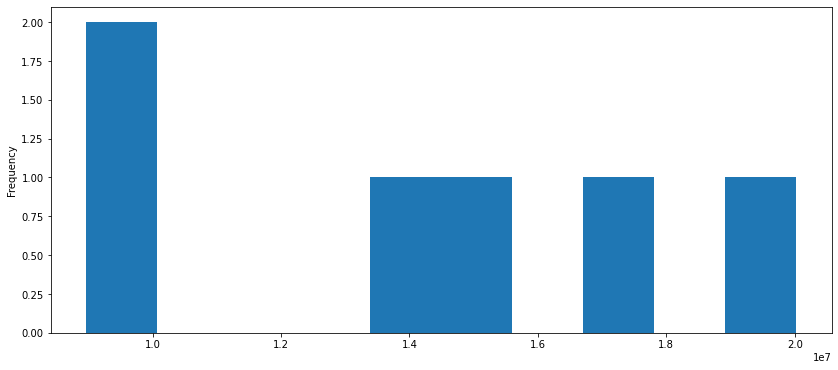

In [36]:
sales.groupby(['Year']).sum()['Revenue'].plot(kind='hist', figsize=(14,6))

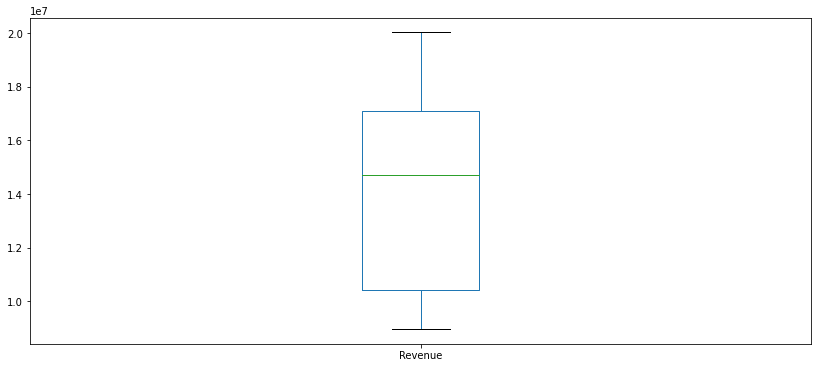

In [37]:
sales.groupby(['Year']).sum()['Revenue'].plot(kind='box', figsize=(14,6))

In [38]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [39]:
sales.groupby(['Country']).sum()['Revenue']

Country
Australia         21302059
Canada             7935738
France             8432872
Germany            8978596
United Kingdom    10646196
United States     27975547
Name: Revenue, dtype: int64

In [40]:
#Draw bar char revenue group by country --> US customer is biggest revenue
sales.groupby(['Country']).sum()['Revenue']
#sales.groupby(['Country']).sum()['Revenue'].plot(kind='bar')

Country
Australia         21302059
Canada             7935738
France             8432872
Germany            8978596
United Kingdom    10646196
United States     27975547
Name: Revenue, dtype: int64

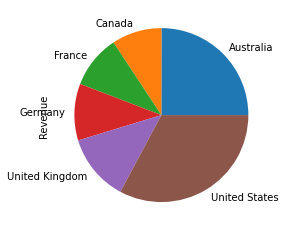

In [41]:
sales.groupby(['Country']).sum()['Revenue'].plot(kind='pie')

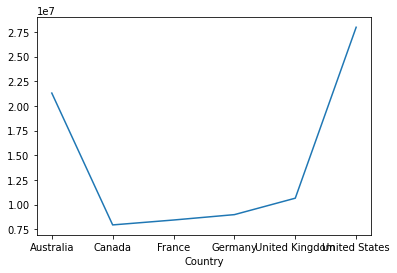

In [42]:
#Calculate revenue by country
sales.groupby(['Country']).sum()['Revenue'].plot()  

In [43]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [44]:
sales['Country'].shape[0]

113036

In [45]:
prices = sales.groupby('Year').mean()['Revenue']
prices


Year
2011    3348.856182
2012    3427.711244
2013     623.492902
2014     481.417920
2015     819.211676
2016     602.537077
Name: Revenue, dtype: float64

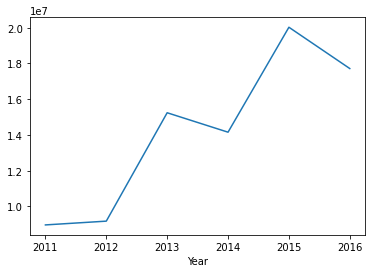

In [46]:
sales.groupby('Year').sum()['Revenue'].plot()

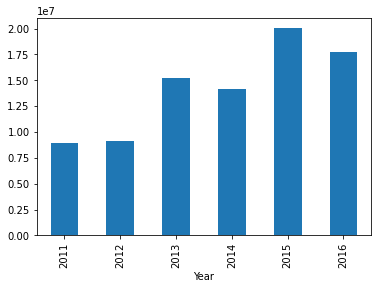

In [47]:
sales.groupby('Year').sum()['Revenue'].plot(kind ='bar')

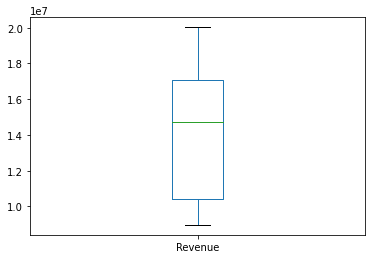

In [48]:
sales.groupby('Year').sum()['Revenue'].plot(kind ='box')

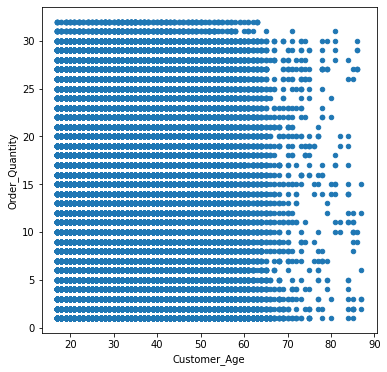

In [49]:
sales.plot(kind='scatter', x='Customer_Age', y='Order_Quantity', figsize=(6,6))

In [50]:
#Create new column to calculate % profit/revenue to judge how effective run of business
sales['ROE %']=sales['Profit']/sales['Revenue']*100
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,ROE %
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,56.892961
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,56.896552
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,56.937799


In [51]:

sales['ROE %'].mean()
sales['ROE %'].median()


52.63157894736842

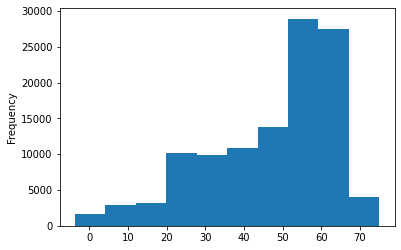

In [52]:
sales['ROE %'].plot(kind='hist')

In [53]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]


73652

In [54]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,ROE %
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,56.892961
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,56.896552
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,56.937799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,60.869565
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,55.367709
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,55.367709
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,54.285714


In [55]:
sales.loc[(sales['Country'] == 'Canada') ].groupby('Year').sum()['Revenue']

Year
2011     789798
2012     835527
2013    1443537
2014    1471522
2015    1731954
2016    1663400
Name: Revenue, dtype: int64

In [56]:
sales.loc[(sales['Day'] == '26')]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,ROE %


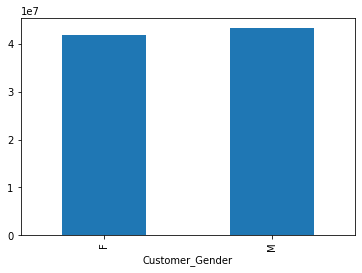

In [57]:
sales.groupby('Customer_Gender').sum()['Revenue'].plot(kind='bar')

In [58]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].describe()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,ROE %
count,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000,73652.000000
mean,15.653424,2014.417178,38.816923,12.064357,257.464373,436.654022,280.999484,456.351192,737.350676,47.636053
std,8.801791,1.269487,11.914412,9.546997,543.191705,911.154971,452.037648,881.982509,1304.187979,16.229128
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,1.000000,2.000000,-3.703704
25%,8.000000,2013.000000,35.000000,2.000000,2.000000,5.000000,28.000000,27.000000,60.000000,36.541353
50%,16.000000,2014.000000,40.000000,11.000000,9.000000,24.000000,95.000000,104.000000,208.000000,52.941176
75%,23.000000,2016.000000,47.000000,20.000000,42.000000,64.000000,351.000000,420.000000,781.000000,60.000000
max,31.000000,2016.000000,64.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,75.000000


In [59]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]


73652

In [60]:
sales.loc[(sales['Country'] == 'Canada')&(sales['Customer_Age']==20) ].groupby('Year').sum()['Revenue']

Year
2013    24560
2014    10712
2015    26851
2016     9749
Name: Revenue, dtype: int64